# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [3]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git commit -m 'made a set of keywords 2019-2022'
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt
#!git commit -m 'added library fuzzywuzzy'
#!git push 

In [4]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import functools
import operator
import os
import os.path as op
import numpy as np
import pytrends
from pytrends.request import TrendReq as UTrendReq
from datetime import date
import datetime as d
from collections import Counter


In [5]:
GET_METHOD='get'


headers = {
    'authority': 'trends.google.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
    'content-type': 'application/json;charset=UTF-8',
    'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
    'origin': 'https://trends.google.com',
    'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-full-version': '"110.0.5481.177"',
    'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-platform-version': '"13.2.1"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
}


class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




In [6]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

#### Finding the subset of the data for 1 Jan 2019 - 1 Jan 2020 based on lastModifiedDate

In [74]:
datetimes = pd.to_datetime(df['lastModifiedDate'])
df['ts_lastModifiedDate']=datetimes
#df.iloc[ts_start]['ts_lastModifiedDate']


#find start index for subset 2019-2022
ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
print(ts_start)
#find end date for subset 2019-2022
ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
print(ts_end)

start_date=datetimes[datetimes == ts_start]
end_date=datetimes[datetimes == ts_end]

#find index for the chosen start and end dates
start_index=start_date.index[0]
print(start_index)
df[df.index == start_date.index[0]]

end_index=end_date.index[0]
print(end_index)
df[df.index == end_date.index[0]]

df_subset=df[start_index:end_index]


2019-01-01 03:57:28.904000+00:00
2022-01-01 02:35:51.098000+00:00
60278
150367


In [75]:
df_subset = df_subset.reset_index()
df_subset

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,ts_lastModifiedDate
0,60278,46912921,"NASA spacecraft enters asteroid Bennu's orbit,...","NASA craft enters asteroid orbit, sets records",<p>NASA's unmanned spacecraft OSIRIS-REx enter...,The OSIRIS-REx spacecraft had arrived at the l...,NASA said its OSIRIS-REx spacecraft succesfull...,,[],"[{'name': 'NASA'}, {'name': 'OSIRIS-REx'}, {'n...",...,"[{'name': 'After two-year journey, NASA Osiris...",False,[],"[{'id': 47376129}, {'id': 47376131}, {'id': 47...",{'description': None},[{'name': 'Sonde «Osiris Rex» nach zwei Jahren...,[{'name': 'DW Newsletter'}],False,None,2019-01-01 03:57:28.904000+00:00
1,60279,46911356,UK brings in boats to patrol English Channel a...,UK deploys boats amid Channel migration spike,<p>Britain will recall two overseas border pat...,The UK is withdrawing patrol ships from overse...,The UK is withdrawing patrol ships from overse...,,[],"[{'name': 'English Channel'}, {'name': 'migrat...",...,[{'name': '40 migrants rescued from boats in E...,False,[],"[{'id': 47375206}, {'id': 47375208}, {'id': 47...",{'description': None},[{'name': 'Großbritanien | Zahl der Bootsflüch...,[],False,None,2019-01-01 06:11:50.527000+00:00
2,60280,46909694,"In Brazil, Jair Bolsonaro tries to unite the e...",Can Bolsonaro unite Brazil's motley right?,<p>Politics without ideologies and party cliqu...,Brazil is inaugurating President Jair Bolsonar...,"In his campaign, Jair Bolsonaro targeted appea...",,[],"[{'name': 'Brazil'}, {'name': 'Jair Bolsonaro'...",...,[{'name': 'Bolsonaro's policies divide Afro-Br...,False,[],"[{'id': 47373913}, {'id': 47374152}, {'id': 47...",{'description': None},[{'name': 'Brasilien - Präsident Jair Bolsonar...,[{'name': ''}],False,None,2019-01-01 06:14:35.563000+00:00
3,60281,46912694,Tokyo: Man deliberately drives van into NYE cr...,Man drives car into Tokyo NYE crowd,<p>At least nine people were injured when a ma...,"A man with an ""intent to murder"" has driven a ...","A man with an ""intent to murder"" has driven a ...",,[],"[{'name': 'Japan'}, {'name': 'Tokyo'}, {'name'...",...,[],False,[],"[{'id': 47376009}, {'id': 47376011}, {'id': 47...",{'description': None},[{'name': 'Japan | Autoangriff in Tokyo'}],[],False,None,2019-01-01 08:26:11.599000+00:00
4,60282,46910092,Bangladesh opposition leader: International co...,International community 'shouldn't recognize n...,"<div class=""vjs-wrapper embed big ""><h2 aria-l...","In an exclusive interview with DW, Kamal Hossa...",Bangladeshi opposition leader Kamal Hossain sl...,,[],"[{'name': 'Asia'}, {'name': 'Bangladesh'}, {'n...",...,[{'name': 'Opinion: Bangladesh's missed chance...,False,[],"[{'id': 47374183}, {'id': 47374251}, {'id': 47...",{'description': None},"[{'name': 'Dr. Kamal Hossain '}, {'name': 'Pre...",[],False,None,2019-01-01 09:05:00.736000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33825,172654,60299904,Germany's Olaf Scholz urges unity in first New...,Germany's Scholz urges unity in first New Year...,"<div class=""vjs-wrapper embed big ""><h2 aria-l...","In his first New Year's message, Olaf Scholz h...","""We will be able to master the major changes o...",,[{'name': 'Germany'}],"[{'name': 'Germany'}, {'name': 'Olaf Scholz'},...",...,[{'name': 'Germany's actual COVID rate '2 or 3...,False,None,"[{'id': 59559319}, {'id': 59559321}, {'id': 59...",{'description': 'German Chancellor Olaf Scholz...,[{'name': 'Deutschland Berlin | Neujahrsanspra...,[],True,ENGLISH,2021-12-31 19:06:43.423000+00:00
33826,172657,60300458,US: Colorado wildfires force tens of thousands...,US: Colorado wildfires force tens of thousands...,<p>Tens of thousands of people in two towns in...,Residents of two communities in the US state o...,Residents of two communities in the US state o...,,[{'name': 'United States of Americ

In [76]:
#start id
print('start id is '+str( df.iloc[int(start_index)]['id'] )+'\n' )

#print(end_date)
print('end id is '+str(df.iloc[int(end_index)]['id'])+'\n') #60305852

start id is 17801447

end id is 51850992



### Keywords exploration

In [9]:
df_subset.keywordStrings

60278                  [NASA, OSIRIS-REx, Bennu, asteroid]
60279    [English Channel, migration, boats, illegal im...
60280    [Brazil, Jair Bolsonaro, Chicago economics, Ha...
60281                     [Japan, Tokyo, Harajuku, attack]
60282    [Asia, Bangladesh, elections, Kamal Hossain, S...
60283    [Iran, sanctions, civil society, nuclear deal,...
60284    [Liviu Dragnea, Viorica Dancila, Klaus Iohanni...
60285    [counterfeit alcohol, adulterated alcohol, fak...
60286    [Edgar Hilsenrath, Schriftsteller, Jude, Der N...
60287      [Indonesia, Java, landslide, natural disasters]
Name: keywordStrings, dtype: object

In [12]:
df_subset.keywordStrings
kw_flat = functools.reduce(operator.add, df_subset.keywordStrings)

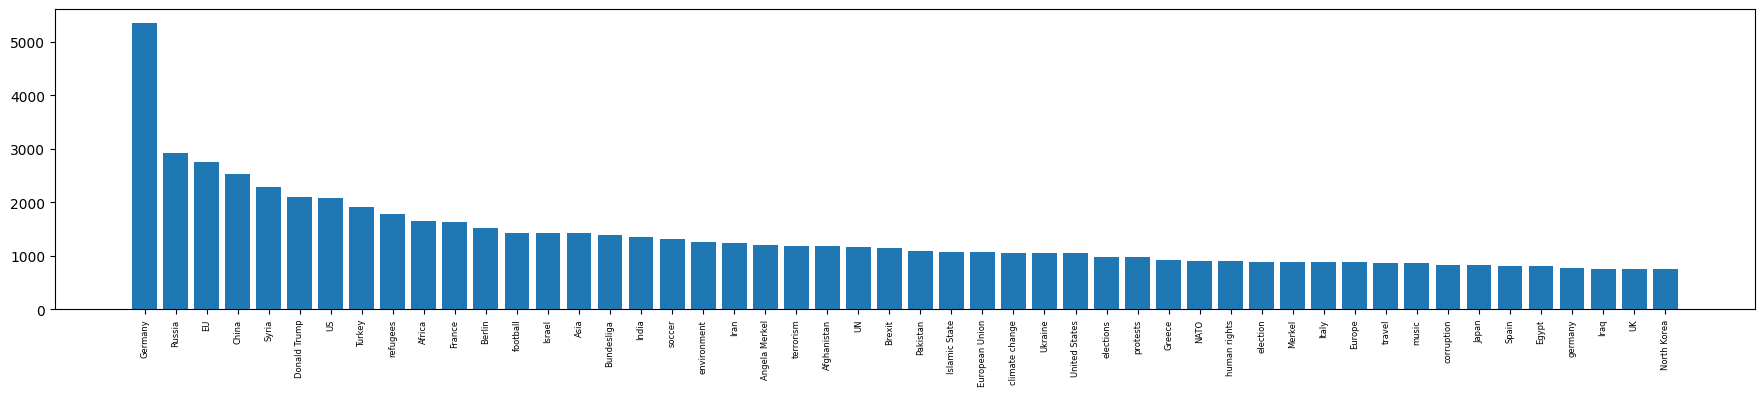

In [15]:
from collections import Counter

freq_kwords = Counter(kw_flat).most_common(50)
x, y = zip(*freq_kwords)

fig = plt.figure(figsize=(17,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xticks(fontsize=6, rotation=90)
plt.show()

In [22]:
output_dir = '/home/marios/S2DS/Spring23_DW/data/processed'
file_name = 'flat_keywords_2019.npy'

np.save(op.join(output_dir, file_name), kw_flat)

In [24]:
kw_flat.count('Angela Merkel')

1206

## Angela Analysis

In [301]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel', 'Angie'], timeframe='2010-01-01 2023-03-15')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')
# angie_does_google = angie_does_google['Angela Merkel'].values


In [41]:
def get_interest_over_time(keyword, start_date = '2019-01-01', end_date=f'{date.today()}'):
    #keywords needs to be a list 
    #need to make sure the total number of characters is less than 100 for Google and terms are fewer than 5 
    # terms = 0
    # chars = 0
    # for word in keywords:
    #     chars += len(word)
    #     if chars > 99:
    #         break
    #     else:
    #         terms += 1
    # if terms > 5:
    #     terms = 5
    # keywords = keywords[:terms]

    print(keyword)
    if len(keyword)>99:
        print('KEYWORD IS TOO LONG FOR THIS SEARCH')
        return None
    
    #let's get python trends 
    pytrend = TrendReq()
    google_df = pytrend.build_payload(kw_list= [keyword], timeframe= '{} {}'.format(str(start_date),str(end_date)))
    google_df = pytrend.interest_over_time()
    if 'isPartial' in google_df.columns:
        google_df = google_df.drop('isPartial', axis = 'columns')
    # turn the df into a dict so we can save it in the bigger 

    return google_df
    

In [49]:
keywords = df['keywordStrings'].iloc[0]
df_test = pd.DataFrame({'keywords':keywords})
df_test['google_trends'] = df_test['keywords'].apply(get_interest_over_time, end_date=('2023-01-01'))

KeyError: 'keywordStrings'

In [65]:
big_df = pd.concat([df_test.google_trends.iloc[i] for i in range(df_test.shape[0])])
big_df
# df_test.google_trends.iloc[0]


,Lisbon Treaty,European Union,Catherine Ashton,Herman Van Rompuy
date,,,,
2019-01-06,10.0,NaN,NaN,NaN
2019-01-13,52.0,NaN,NaN,NaN
2019-01-20,78.0,NaN,NaN,NaN
2019-01-27,33.0,NaN,NaN,NaN
2019-02-03,24.0,NaN,NaN,NaN
...,...,...,...,...
2022-12-04,NaN,NaN,NaN,13.0
2022-12-11,NaN,NaN,NaN,0.0
2022-12-18,NaN,NaN,NaN,0.0


In [74]:
df_test.iloc[0,1].index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10',
               ...
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01'],
              dtype='datetime64[ns]', name='date', length=209, freq=None)

In [180]:
#let's get timeseries from all Angela Merkel mentions 
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)

df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)
df_angela['date_month'] = df_angela['date_month'].apply(lambda x: int(x.replace('-','')))
all_year_months = [year*100+month for month in range(1, 13) for year in range(2010, 2023)]

In [181]:
not_in_df = list(set(all_year_months) - set(df_angela['date_month'].tolist()))
yearmonth_counts = dict(Counter(df_angela['date_month'].tolist()))
for key_ in not_in_df:
    yearmonth_counts[key_] = 0 

In [182]:
yearmonth_counts.keys()
df_yearmonth_counts = pd.DataFrame.from_dict(yearmonth_counts, orient='index', columns=['val'])
df_yearmonth_counts['month_str'] = [str(i) for i in df_yearmonth_counts.index]
df_yearmonth_counts = df_yearmonth_counts.sort_values(by='month_str')


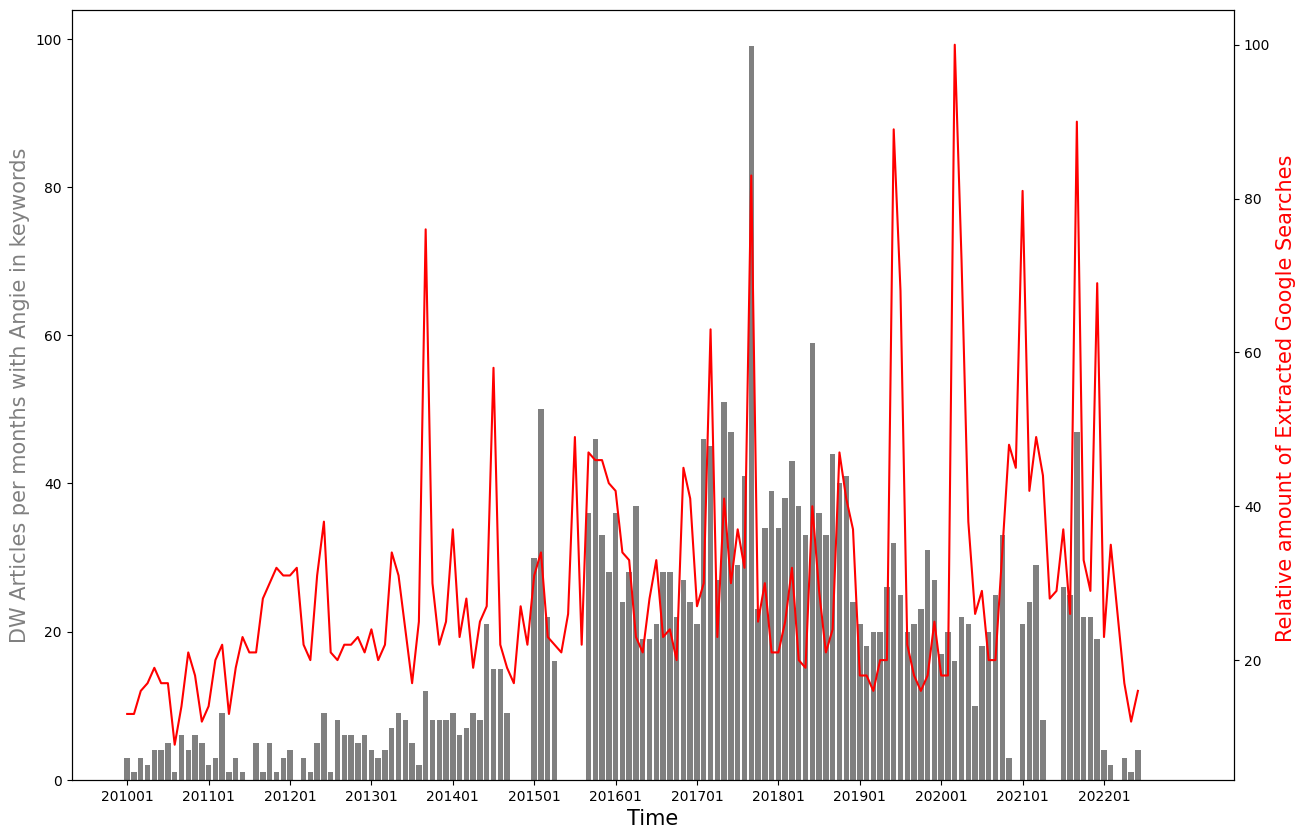

In [192]:
fig,ax = plt.subplots(figsize = (15,10))
ax.bar(df_yearmonth_counts['month_str'], df_yearmonth_counts.val, color = 'grey')
ax.set_xticks(df_yearmonth_counts['month_str'][::12], rotate = 60)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('DW Articles per months with Angie in keywords', color = 'grey', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(np.arange(0,len(angie_does_google_final.values)), angie_does_google_final.values, color = 'r')
ax2.set_ylabel('Relative amount of Extracted Google Searches ', color = 'r', fontsize = 15)
# save it
output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
file_name = 'Angela_Merkel_and_DW_a_love_story.pdf'
fig.savefig(op.join(output_dir,file_name))
plt.show()


In [53]:
#let's extract this signal

# months = Counter(list(np.asarray(df_angela.date_month))).most_common()
# x, y = zip(*months)
# zipped = zip(x,y)
# zipped = sorted(zipped)
# x, angie_DW = zip(*zipped) # this is also wrong (missingn months are not taken into account)


In [48]:
df_yearmonth_counts.val

NameError: name 'df_yearmonth_counts' is not defined